In [1]:
from src.utils.PathManager import Paths as Path 
from src.utils.Visualisation import plot_ROC_simple
from src.utils.BayesianLabel import * 
import pandas as pd 
import numpy as np 
import yaml 
from datetime import timedelta
import matplotlib.pyplot as plt 

In [2]:
well_id = "ACRUS1"
labeler = BayesianLabeler(well_id)
agg_df = labeler.agg_df
raw_df = labeler.raw_df
weather_df = labeler.weather_df
label_df = labeler.label_df

In [3]:
start = '2019-10-13'
end='2019-12-12'


In [4]:
data = agg_df.loc[start:end,['weather_label','minV','meanV']]

In [5]:
data[data.minV.isnull()]

,weather_label,minV,meanV
2019-11-12,1,NaN,NaN


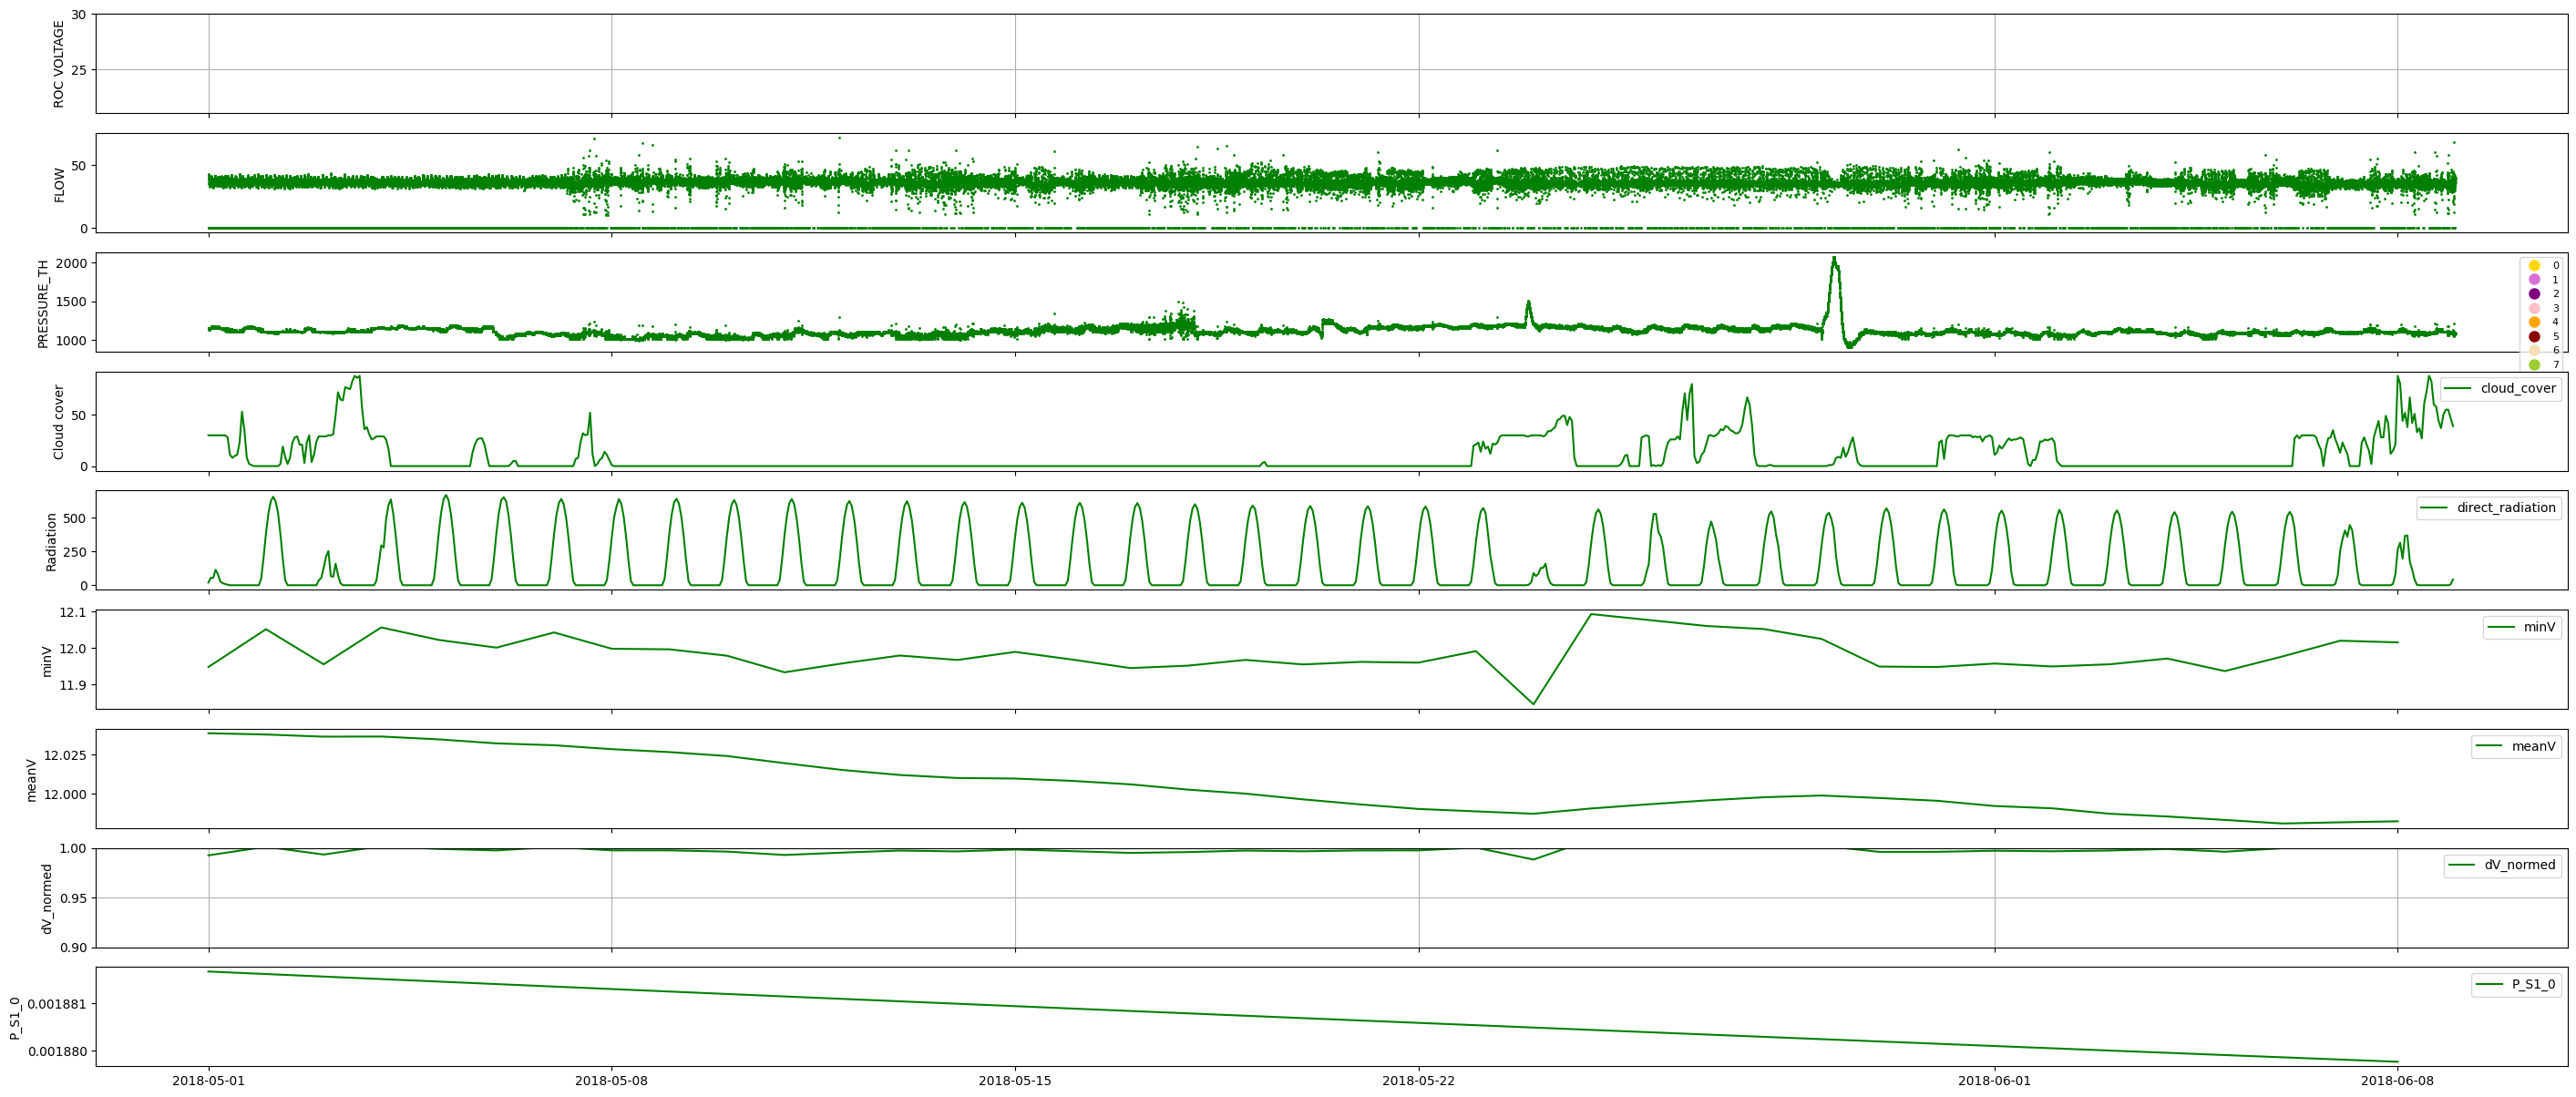

In [6]:
start='2018-05-01'
end='2018-06-08'
fig = plot_ROC_simple(raw_df,label_df,start,end,weather_df=weather_df, generated_feature_df = agg_df.loc[:,['minV','meanV','dV_normed','P_S1_0']],ylim={"ROC_VOLTAGE":[21,30]})

In [ ]:
well_id = "TIRRA88"
labeler = BayesianLabeler(well_id, method='median')
agg_df = labeler.agg_df
raw_df = labeler.raw_df
weather_df = labeler.weather_df
label_df = labeler.label_df

In [ ]:
start='2019-01-01'
end='2019-03-01'
fig = plot_ROC_simple(raw_df,label_df,start,end,weather_df=weather_df, generated_feature_df = agg_df.loc[:,['minV','meanV','dV_normed','P_S1_0','P_S1_1','P_S1_2']],ylim={"ROC_VOLTAGE":[20,30]})

In [ ]:
well_id = "TIRRA88"
labeler = BayesianLabeler(well_id, method='mean',n_std=2.0)
agg_df = labeler.agg_df
raw_df = labeler.raw_df
weather_df = labeler.weather_df
label_df = labeler.label_df

In [ ]:
start='2019-01-01'
end='2019-03-01'
fig = plot_ROC_simple(raw_df,label_df,start,end,weather_df=weather_df, generated_feature_df = agg_df.loc[:,['minV','meanV','dV_normed','P_S1_0','P_S1_1','P_S1_2']],ylim={"ROC_VOLTAGE":[20,30]})

In [ ]:
well_id = "TIRRA88"
labeler = BayesianLabeler(well_id, method='exp_mean',n_std=2.0)
agg_df = labeler.agg_df
raw_df = labeler.raw_df
weather_df = labeler.weather_df
label_df = labeler.label_df

In [ ]:
start='2019-01-01'
end='2019-03-01'
fig = plot_ROC_simple(raw_df,label_df,start,end,weather_df=weather_df, generated_feature_df = agg_df.loc[:,['minV','meanV','dV_normed','P_S1_0','P_S1_1','P_S1_2']],ylim={"ROC_VOLTAGE":[20,30]})

In [ ]:
well_id = "TIRRA88"
labeler = BayesianLabeler(well_id, method='90_percentile',n_std=2.0)
agg_df = labeler.agg_df
raw_df = labeler.raw_df
weather_df = labeler.weather_df
label_df = labeler.label_df

In [ ]:
start='2019-01-01'
end='2019-03-01'
fig = plot_ROC_simple(raw_df,label_df,start,end,weather_df=weather_df, generated_feature_df = agg_df.loc[:,['minV','meanV','dV_normed','P_S1_0','P_S1_1','P_S1_2']],ylim={"ROC_VOLTAGE":[20,30]})

In [ ]:
well_id = "TIRRA88"
labeler = BayesianLabeler(well_id, method='10_percentile',n_std=2.0)
agg_df = labeler.agg_df
raw_df = labeler.raw_df
weather_df = labeler.weather_df
label_df = labeler.label_df

In [ ]:
start='2019-01-01'
end='2019-03-01'
fig = plot_ROC_simple(raw_df,label_df,start,end,weather_df=weather_df, generated_feature_df = agg_df.loc[:,['minV','meanV','dV_normed','P_S1_0','P_S1_1','P_S1_2']],ylim={"ROC_VOLTAGE":[20,30]})

In [ ]:
import yaml 
with open(Path.config("well_type.yaml"),'r') as file:
    well_dict = yaml.safe_load(file)

In [ ]:
wells = list(well_dict.keys())

In [ ]:
all_data = []
for well_id in wells: 
    labeler = BayesianLabeler(well_id)
    data = labeler.agg_df.loc[:,['dV_normed','labels']]
    data.labels = data.labels.fillna(value=11,axis=0)
    data['WELL_CD']=well_id
    all_data.append(data)
    

In [ ]:
data = labeler.agg_df.loc[:,['dV_normed','labels']]
data.labels = data.labels.fillna(value=11,axis=0)

In [ ]:
merge_df = pd.concat(all_data,axis=0)

In [ ]:
plt.hist(merge_df.dV_normed,bins=[0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0,1.1,1.2])
plt.show()

In [ ]:
plt.hist(merge_df.loc[merge_df.labels.isin([2,5]),'dV_normed'],bins=[0.90,0.96,0.98,1.0])

In [ ]:
plt.hist(merge_df.loc[~merge_df.labels.isin([2,5]),'dV_normed'],bins=[0.90,0.96,0.98,1.0])

In [ ]:
merge_df.loc[(merge_df.labels.isin([2,5]))&(merge_df.dV_normed>1.0)].WELL_CD.unique()

In [ ]:
np.arange(0.9,1.0,0.01)